In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd


In [2]:
#load the data
forestfires = pd.read_csv("C:/Users/shruti pandey/Downloads/forestfires.csv")
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Count of duplicated rows
forestfires[forestfires.duplicated()].shape

(8, 31)

In [6]:
#Print the duplicated rows
forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
#Dropping the Duplicates.
forestfires.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
#data types
forestfires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [9]:
#As dummy variables are already created, we will remove the month and alsoday columns
forestfires.drop(["month","day"],axis=1,inplace = True)


In [10]:
forestfires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [11]:
#missing values
forestfires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
##I am taking small as 0 and large as 1
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [13]:
#Normalization.
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [14]:
#splitting the data
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [15]:
len(predictors)

517

In [16]:
len(target)

517

In [17]:
predictors

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
target

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [19]:
#adding the predictor to normalizaition
predictors1 = norm_func(predictors)

In [20]:
#splitting the data using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)

In [21]:
#building the model
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])
    return model  

In [22]:
#fitting the model to x train & y train
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.asarray(x_train).astype(np.int),np.asarray(y_train).astype(np.int),epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 1s 3ms/step - loss: 0.6871 - accuracy: 0.6106
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.7157
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.7153
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.7280
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.6990
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.7245
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.7366
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5856 - accuracy: 0.7192
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7060
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.7088
Epoch 11/

12/12 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7930
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7593
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7883
Epoch 86/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.7426
Epoch 87/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.7767
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.7612
Epoch 89/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5062 - accuracy: 0.7630
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7743
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7711
Epoch 92/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7881
Epoch 93/500


Epoch 164/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7442
Epoch 165/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7893
Epoch 166/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7585
Epoch 167/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7480
Epoch 168/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7565
Epoch 169/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7668
Epoch 170/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7795
Epoch 171/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7849
Epoch 172/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7559
Epoch 173/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4845 - accurac

12/12 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7862
Epoch 246/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4671 - accuracy: 0.7772
Epoch 247/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.7851
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4834 - accuracy: 0.7614
Epoch 249/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4882 - accuracy: 0.7506
Epoch 250/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7348
Epoch 251/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7610
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7661
Epoch 253/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7619
Epoch 254/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7650
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7862
Epoch 327/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7913
Epoch 328/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.7764
Epoch 329/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7671
Epoch 330/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7552
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7769
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7582
Epoch 333/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7912
Epoch 334/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7304
Epoch 335/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7691
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7666
Epoch 407/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7637
Epoch 408/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7986
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7420
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7445
Epoch 411/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7744
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7965
Epoch 413/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7697
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7667
Epoch 415/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7695
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7653
Epoch 488/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7637
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7868
Epoch 490/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7389
Epoch 491/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7929
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.7444
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.7673
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7741
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 0.4573 - accuracy: 0.7641
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7431
Epoc

In [23]:
#Converting the predicted values to series 
pred_train = pd.Series([i[0] for i in pred_train])

In [24]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [25]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

0    264
1     97
Name: size_category, dtype: int64

In [26]:
#For training data
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) 

0.7313019390581718

In [27]:
#Confusion matrix for train data
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
small,97,264


In [28]:
#For test data
pred_test = first_model.predict(x_test)
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"


In [29]:
test["original_class"].value_counts()
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) 

0.7307692307692307

In [30]:
#confusion matrix for test data
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
small,42,114


#### Building Different models using diffrent loss function and optimizer.

In [31]:
from keras import Sequential

In [40]:
scores = first_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (first_model.metrics_names[1], scores[1]*100))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [59]:
#building the model
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="linear"))
    model.compile(loss="mean_squared_error",optimizer = "adam",metrics = ["mse"])
    return model  

In [35]:
#fitting the model to x train & y train
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.asarray(x_train).astype(np.int),np.asarray(y_train).astype(np.int),epochs=500)
pred_train = first_model.predict(np.array(x_train))

Epoch 1/500
12/12 [==============================] - 3s 2ms/step - loss: 0.6886 - accuracy: 0.6233
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.7242
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.6275 - accuracy: 0.7444
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7344
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7141
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7438
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.7079
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7418
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.6991
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7222
Epoch 11/

12/12 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7639
Epoch 84/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.7408
Epoch 85/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7708
Epoch 86/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7768
Epoch 87/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7451
Epoch 88/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7916
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.7527
Epoch 90/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7507
Epoch 91/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7885
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7541
Epoch 93/500


12/12 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7996
Epoch 246/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7597
Epoch 247/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8044
Epoch 248/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7825
Epoch 249/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7628
Epoch 250/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8073
Epoch 251/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7418
Epoch 252/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.7588
Epoch 253/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7832
Epoch 254/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4646 - accuracy: 0.7860
Epoc

12/12 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7681
Epoch 406/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7802
Epoch 407/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7659
Epoch 408/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.7774
Epoch 409/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7699
Epoch 410/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.7805
Epoch 411/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7688
Epoch 412/500
12/12 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7717
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7615
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7747
Epoc

In [37]:
# evaluate the model
scores = model.evaluate(predictors,target)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: name 'model' is not defined

In [42]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=28, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

TypeError: ('Keyword argument not understood:', 'init')

In [33]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
# Fit the model
hist=model.fit(np.array(x_train),np.array(y_train), validation_split=0.33, nb_epoch=150, batch_size=10)

E:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 241 samples, validate on 120 samples
Epoch 1/150
241/241 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.7054 - val_loss: 0.6880 - val_accuracy: 0.7000
Epoch 2/150
241/241 [==============================] - 0s 232us/step - loss: 0.6802 - accuracy: 0.7469 - val_loss: 0.6761 - val_accuracy: 0.7000
Epoch 3/150
241/241 [==============================] - 0s 199us/step - loss: 0.6614 - accuracy: 0.7469 - val_loss: 0.6541 - val_accuracy: 0.7000
Epoch 4/150
241/241 [==============================] - 0s 199us/step - loss: 0.6239 - accuracy: 0.7469 - val_loss: 0.6229 - val_accuracy: 0.7000
Epoch 5/150
241/241 [==============================] - 0s 232us/step - loss: 0.5787 - accuracy: 0.7469 - val_loss: 0.6132 - val_accuracy: 0.7000
Epoch 6/150
241/241 [==============================] - 0s 199us/step - loss: 0.5617 - accuracy: 0.7469 - val_loss: 0.6189 - val_accuracy: 0.7000
Epoch 7/150
241/241 [==============================] - 0s 199us/step - loss: 0.5611 - 

In [35]:
# evaluate the model
scores = model.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

361/361 [==============================] - 0s 22us/step
accuracy: 79.78%


##### Thus we are getting the best acurracy using loss="binary_crossentropy",optimizer = "rmsprop".

In [36]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

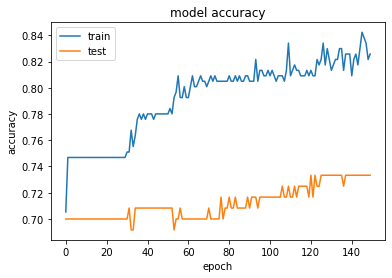

In [37]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

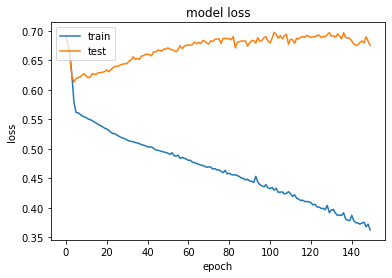

In [38]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()